# Importing Libraries

In [35]:
import numpy as np # linear algebra
import pandas as pd# data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import os
import cv2
import numpy as np
from numpy import save
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow import keras

# Class Names

In [37]:
class_names = ['apple', 'banana',  'beetroot',  'bell pepper',  'cabbage',  'capsicum',  'carrot',
           'cauliflower', 'chilli pepper', 'corn',  'cucumber',  'eggplant',  'garlic',  'ginger',
          'grapes',  'jalepeno', 'kiwi',  'lemon',  'lettuce',
           'mango',  'onion',  'orange',  'paprika',  'pear',  'peas',  'pineapple',
          'pomegranate', 'potato',  'raddish',  'soy beans',  'spinach', 'sweetcorn',
           'sweetpotato',  'tomato',  'turnip',  'watermelon']
file_names = []
train_data_array = []
train_data_labels_array = []

print("Loading the training data")

Loading the training data


# Train-Data Preprocessing

In [38]:
count = 0
for dirname, _, filenames in os.walk("C:/Users/Lenovo/Downloads/archive/train"):
    #print(dirname)
    for filename in filenames:
        frame = cv2.imread(os.path.join(dirname, filename))
        #print(os.path.join(dirname, filename))
        # Check the validity of the image
        if frame is None:
            print("not an image")
        else:
            resized = cv2.resize(frame, (224, 224), interpolation=cv2.INTER_AREA)
            checkSize = resized.shape[0]
            if checkSize == 224:
                file_names.append(dirname+"/"+filename)
                train_data_array.append(resized)
                index = class_names.index(os.path.basename(dirname))
                train_data_labels_array.append(index)
                #print(os.path.basename(dirname))
                count += 1
                print(count)
                print(dirname, filename)

1
C:/Users/Lenovo/Downloads/archive/train\apple Image_1.jpg
2
C:/Users/Lenovo/Downloads/archive/train\apple Image_10.jpg
3
C:/Users/Lenovo/Downloads/archive/train\apple Image_16.jpg
4
C:/Users/Lenovo/Downloads/archive/train\apple Image_17.jpg
5
C:/Users/Lenovo/Downloads/archive/train\apple Image_18.jpg
6
C:/Users/Lenovo/Downloads/archive/train\apple Image_19.jpg
7
C:/Users/Lenovo/Downloads/archive/train\apple Image_2.jpg
8
C:/Users/Lenovo/Downloads/archive/train\apple Image_20.jpg
9
C:/Users/Lenovo/Downloads/archive/train\apple Image_21.jpg
10
C:/Users/Lenovo/Downloads/archive/train\apple Image_23.jpg
11
C:/Users/Lenovo/Downloads/archive/train\apple Image_24.jpg
12
C:/Users/Lenovo/Downloads/archive/train\apple Image_25.jpg
13
C:/Users/Lenovo/Downloads/archive/train\apple Image_26.jpg
14
C:/Users/Lenovo/Downloads/archive/train\apple Image_27.jpg
15
C:/Users/Lenovo/Downloads/archive/train\apple Image_28.jpg
16
C:/Users/Lenovo/Downloads/archive/train\apple Image_3.jpg
17
C:/Users/Lenovo/D

In [39]:
train_data = np.array(train_data_array)
train_data_labels = np.array(train_data_labels_array)

print("Finished loading the training data")
print("Number of training records : ", train_data.shape[0])

print(train_data.shape)

print(train_data_labels.shape)

Finished loading the training data
Number of training records :  3114
(3114, 224, 224, 3)
(3114,)


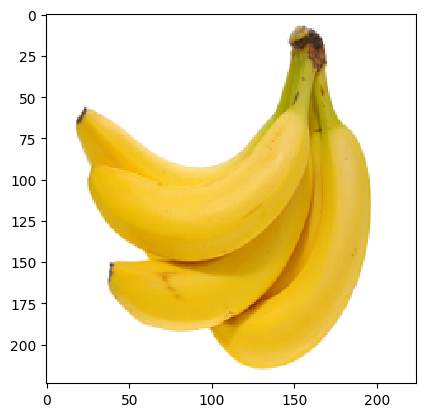

banana
C:/Users/Lenovo/Downloads/archive/train\banana/Image_53.png


In [41]:
demoImage = train_data[100]
plt.imshow(cv2.cvtColor(demoImage, cv2.COLOR_BGR2RGB), interpolation='nearest')
plt.show()
index = train_data_labels[100]
print(class_names[index])
print(file_names[100])

# Test-Data Preprocessing

In [42]:
test_file_names = []
test_data_array = []
test_data_big_array = []
test_data_labels_array = []
print("Loading the testing data")

Loading the testing data


In [43]:
count = 0
for dirname, _, filenames in os.walk("C:/Users/Lenovo/Downloads/archive/test"):
    #print(dirname)
    for filename in filenames:
        frame = cv2.imread(os.path.join(dirname, filename))
        #print(os.path.join(dirname, filename))
        # Check the validity of the image
        if frame is None:
            print("not an image")
        else:
            resizedBig = cv2.resize(frame, (224, 224), interpolation=cv2.INTER_AREA)
            resized = cv2.resize(frame, (224, 224), interpolation=cv2.INTER_AREA)
            checkSize = resized.shape[0]
            if checkSize == 224:
                test_file_names.append(dirname+"/"+filename)
                test_data_array.append(resized)
                test_data_big_array.append(resizedBig)
                index = class_names.index(os.path.basename(dirname))
                test_data_labels_array.append(index)
                #print(os.path.basename(dirname))
                count += 1
                print(count)
                print(dirname, filename)

1
C:/Users/Lenovo/Downloads/archive/test\apple Image_1.jpg
2
C:/Users/Lenovo/Downloads/archive/test\apple Image_10.jpg
3
C:/Users/Lenovo/Downloads/archive/test\apple Image_2.jpg
4
C:/Users/Lenovo/Downloads/archive/test\apple Image_3.jpg
5
C:/Users/Lenovo/Downloads/archive/test\apple Image_4.jpg
6
C:/Users/Lenovo/Downloads/archive/test\apple Image_5.jpg
7
C:/Users/Lenovo/Downloads/archive/test\apple Image_6.JPG
8
C:/Users/Lenovo/Downloads/archive/test\apple Image_7.jpg
9
C:/Users/Lenovo/Downloads/archive/test\apple Image_8.jpg
10
C:/Users/Lenovo/Downloads/archive/test\apple Image_9.jpg
11
C:/Users/Lenovo/Downloads/archive/test\banana Image_1.jpg
12
C:/Users/Lenovo/Downloads/archive/test\banana Image_10.jpg
13
C:/Users/Lenovo/Downloads/archive/test\banana Image_2.jpg
14
C:/Users/Lenovo/Downloads/archive/test\banana Image_3.jpg
15
C:/Users/Lenovo/Downloads/archive/test\banana Image_4.jpg
16
C:/Users/Lenovo/Downloads/archive/test\banana Image_5.jpg
17
C:/Users/Lenovo/Downloads/archive/test

In [44]:
test_data = np.array(test_data_array)
test_data_big = np.array(test_data_big_array)
test_data_labels = np.array(test_data_labels_array)

print("Finished loading the testing data")
print("Number of testing records : ", test_data.shape[0])

print(test_data.shape)
print(test_data_labels.shape)

Finished loading the testing data
Number of testing records :  359
(359, 224, 224, 3)
(359,)


# Data Normalization

In [45]:
train_data = train_data / 255.0
test_data = test_data / 255.0

# MobileNet V2 model with custom dense layer

In [46]:
from tensorflow import keras
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input, decode_predictions
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense

# Load MobileNetV2 model pre-trained on ImageNet
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Add custom dense layers for your specific classification task
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(128, activation='relu')(x)
predictions = Dense(36, activation='softmax')(x)  # Assuming 36 classes for food items

# Create the full model
model = keras.Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()


Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_3[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[0][0]']      

# Compilation and Training

In [47]:

# compile the model
model.compile(
    # optimizer -> calculate the gradient descent of the network
    optimizer='adam',
    # loss function
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'] # metrics measurement
)

print("Finished compile the model")

Finished compile the model


In [48]:
# train the model
# starting with 120 epochs, will tweak it accordingly to increase the efficiency
model.fit(train_data, train_data_labels, epochs=120)

print("Finished training the model")

Epoch 1/120
98/98 [==============================] - 52s 498ms/step - loss: 1.7980 - accuracy: 0.5128
Epoch 2/120
98/98 [==============================] - 49s 498ms/step - loss: 0.7059 - accuracy: 0.7916
Epoch 3/120
98/98 [==============================] - 52s 531ms/step - loss: 0.4415 - accuracy: 0.8709
Epoch 4/120
98/98 [==============================] - 50s 506ms/step - loss: 0.2930 - accuracy: 0.9216
Epoch 5/120
98/98 [==============================] - 47s 476ms/step - loss: 0.1849 - accuracy: 0.9647
Epoch 6/120
98/98 [==============================] - 45s 462ms/step - loss: 0.1397 - accuracy: 0.9727
Epoch 7/120
98/98 [==============================] - 45s 462ms/step - loss: 0.1093 - accuracy: 0.9785
Epoch 8/120
98/98 [==============================] - 45s 463ms/step - loss: 0.0877 - accuracy: 0.9807
Epoch 9/120
98/98 [==============================] - 46s 466ms/step - loss: 0.0734 - accuracy: 0.9839
Epoch 10/120
98/98 [==============================] - 45s 463ms/step - loss: 0.055

# Model Evaluation

In [49]:
# Ensure your test data and labels are non-empty
if test_data is not None and test_data_labels is not None:
    print("Test data shape:", test_data.shape)
    print("Test data labels shape:", test_data_labels.shape)

    # Debugging: Print a few examples of test data and labels
    print("Example Test Data:")
    print(test_data[:2])

    print("Example Test Labels:")
    print(test_data_labels[:2])

    # Check for non-empty data
    if test_data.size == 0 or test_data_labels.size == 0:
        print("Test data or labels are empty. Please check your data loading and preprocessing.")
    else:
        # Evaluate the model on the test data
        test_loss, test_acc = model.evaluate(test_data, test_data_labels, verbose=1)
    
        # Print the test accuracy
        print("************ Test accuracy: ", test_acc)
else:
    print("Test data or labels are empty or None. Please check your data loading and preprocessing.")


Test data shape: (359, 224, 224, 3)
Test data labels shape: (359,)
Example Test Data:
[[[[1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]
   ...
   [1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]]

  [[1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]
   ...
   [1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]]

  [[1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]
   ...
   [1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]]

  ...

  [[1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]
   ...
   [1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]]

  [[1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]
   ...
   [1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]]

  [[1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]
   ...
   [1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]]]


 [[[1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]
   ...
   [1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]]

  [[1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]
   ...
   [1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]]

  [[1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]
   ...
   [1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]]

  ...

  [[1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]
   ...
   [1. 1. 1.

12/12 [==============================] - 5s 433ms/step
               precision    recall  f1-score   support

        apple       1.00      0.80      0.89        10
       banana       1.00      0.78      0.88         9
     beetroot       1.00      1.00      1.00        10
  bell pepper       1.00      0.90      0.95        10
      cabbage       1.00      1.00      1.00        10
     capsicum       0.91      1.00      0.95        10
       carrot       1.00      0.90      0.95        10
  cauliflower       1.00      1.00      1.00        10
chilli pepper       1.00      1.00      1.00        10
         corn       0.82      0.90      0.86        10
     cucumber       1.00      1.00      1.00        10
     eggplant       1.00      1.00      1.00        10
       garlic       1.00      1.00      1.00        10
       ginger       1.00      1.00      1.00        10
       grapes       1.00      1.00      1.00        10
     jalepeno       1.00      1.00      1.00        10
         

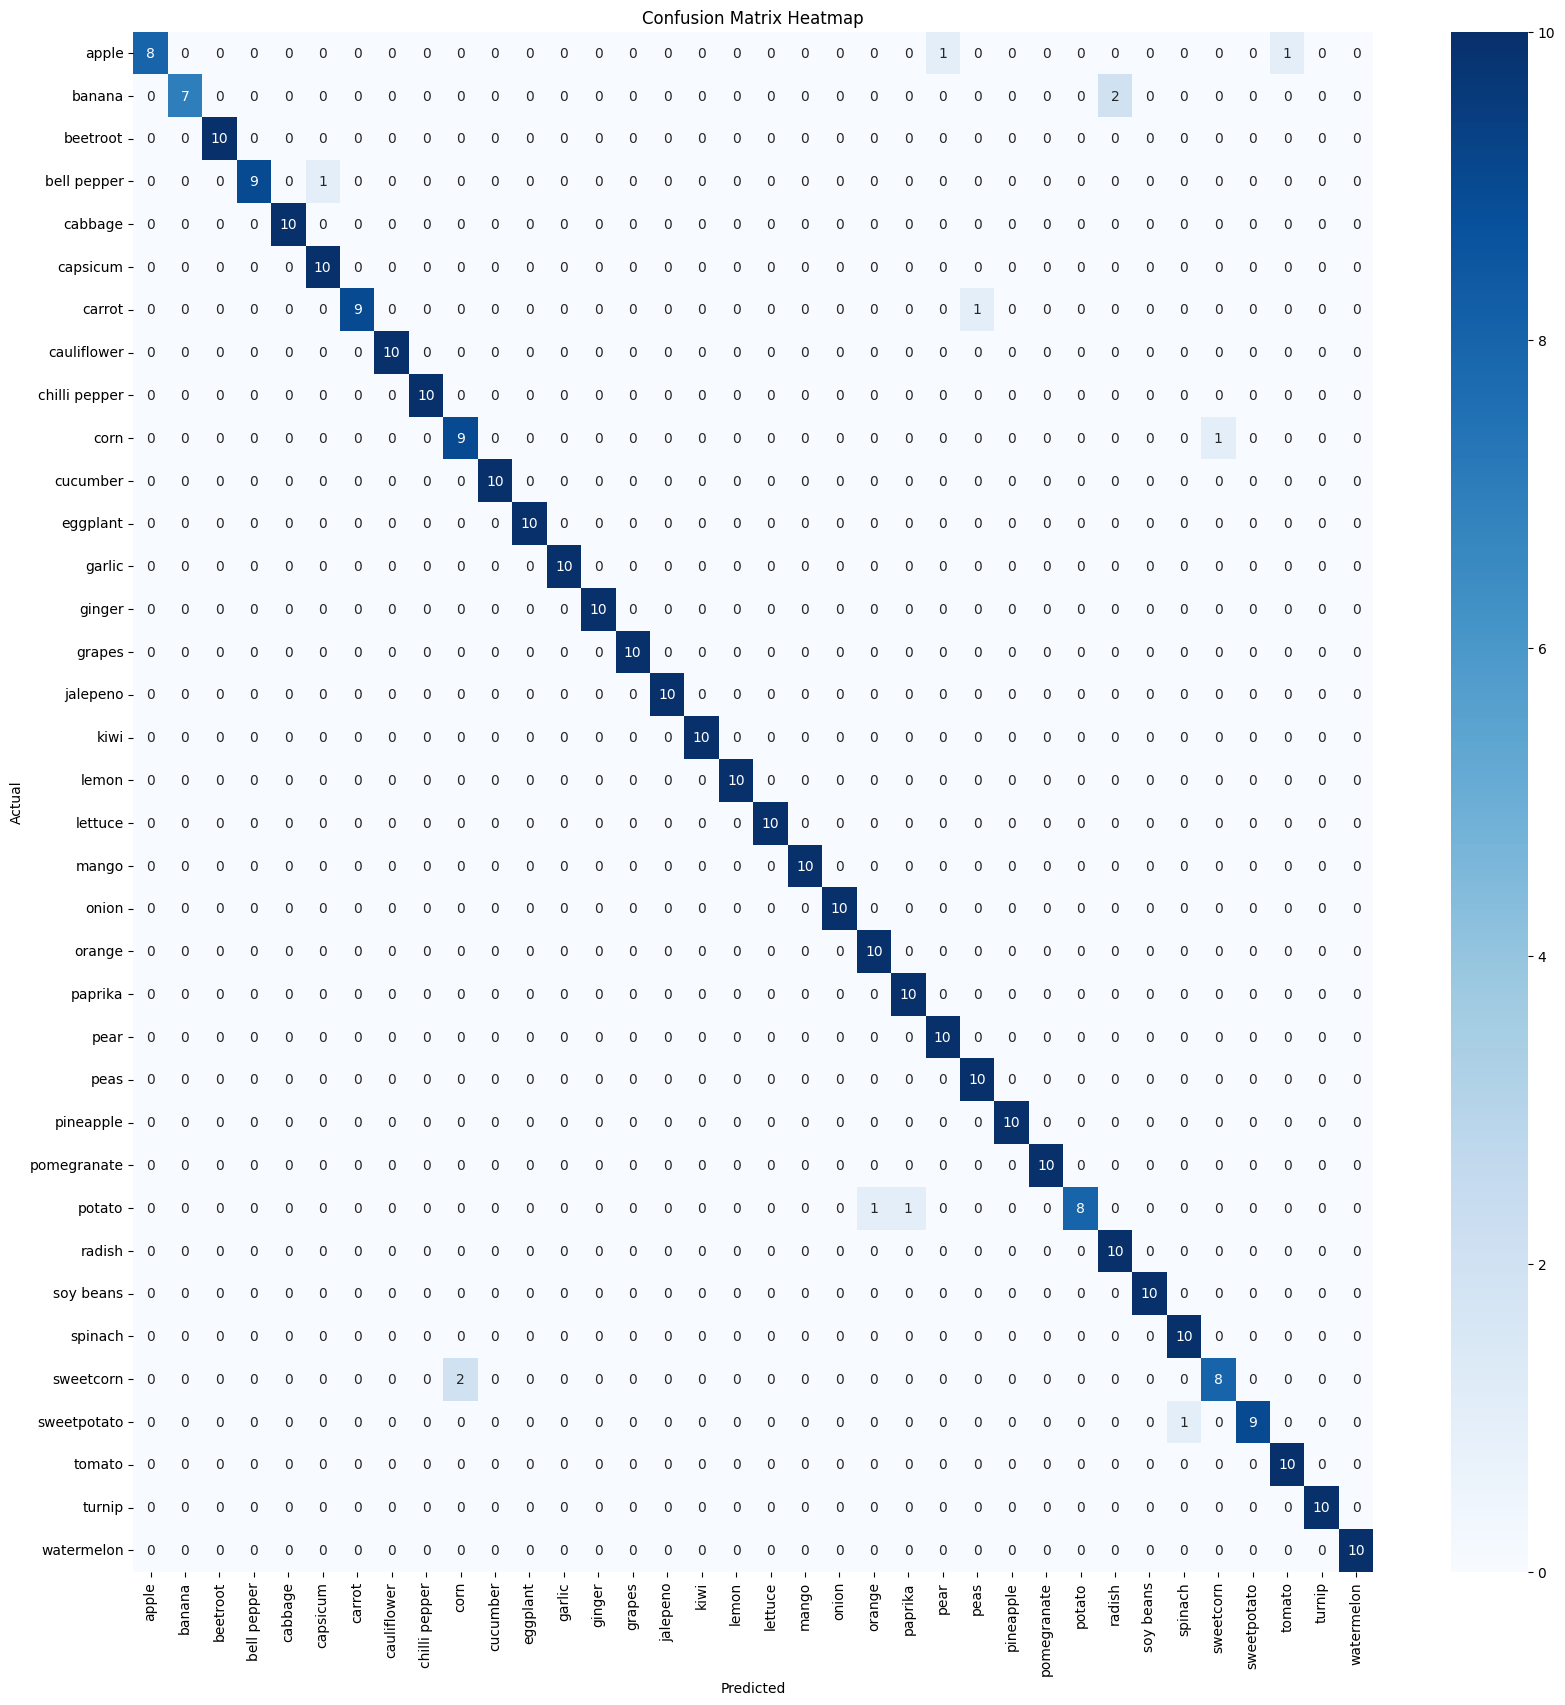

In [53]:
from sklearn.metrics import classification_report, confusion_matrix


# Assuming 'model' is your trained model and 'test_data' is your test data
predicted_probabilities = model.predict(test_data)
predicted_labels = np.argmax(predicted_probabilities, axis=1)

# Assuming 'test_data_labels' is the array of true labels for your test data
# If 'test_data_labels' is one-hot encoded, you don't need to apply np.argmax
# If it's not one-hot encoded, you might not need np.argmax at all
# test_data_labels = np.argmax(test_data_labels, axis=1)  # Comment or remove this line

# Generate classification report
print(classification_report(test_data_labels, predicted_labels, target_names=class_names))

# Generate confusion matrix
conf_mat = confusion_matrix(test_data_labels, predicted_labels)

# Plot confusion matrix
plt.figure(figsize=(20, 20))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Confusion Matrix Heatmap")

# Save the heatmap as an image file
plt.savefig("confusion_matrix_heatmap.png")
plt.show()


In [54]:
test_loss, test_acc = model.evaluate(test_data, test_data_labels, verbose=1) # verbose is a parameter of how detailed is the log in the console
print("************ Test accuracy : ", test_acc)



12/12 [==============================] - 5s 427ms/step - loss: 0.1989 - accuracy: 0.9666
************ Test accuracy :  0.9665738344192505


# test data prediction

12/12 [==============================] - 6s 458ms/step


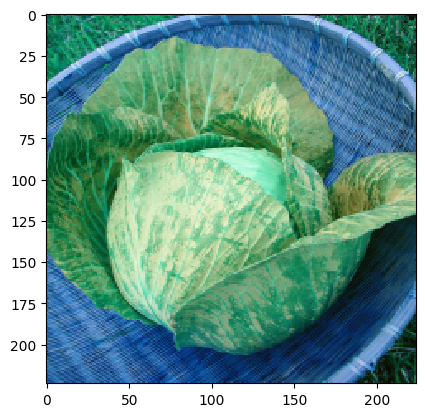

Real Class :  cabbage
Predict Class :  cabbage
C:/Users/Lenovo/Downloads/archive/test\cabbage/Image_10.jpg


In [55]:
searchIndex = 40
predictions = model.predict(test_data)

predict_index = np.argmax(predictions[searchIndex])
#print(class_index)

predict_name = class_names[predict_index]

demoImage = test_data_big[searchIndex]
#print(demoImage)
plt.imshow(demoImage, interpolation='nearest')
plt.show()
real_index = test_data_labels[searchIndex]
print("Real Class : ", class_names[real_index]) # Showing the real name
print("Predict Class : ", class_names[predict_index]) # Showing the predicted name
print(test_file_names[searchIndex])

# Saving Model

In [59]:
model.save('FV.h5')

c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [60]:

# Load your trained model
model = tf.keras.models.load_model('FV.h5')

# Convert to TFLite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open('model.tflite', 'wb') as f:
    f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\Lenovo\AppData\Local\Temp\tmpfzpnzyny\assets


INFO:tensorflow:Assets written to: C:\Users\Lenovo\AppData\Local\Temp\tmpfzpnzyny\assets


In [61]:
import os
print("Current Working Directory:", os.getcwd())


Current Working Directory: c:\Users\Lenovo\OneDrive\Desktop\main


In [62]:
model_path = os.path.abspath('FV.h5')
model = load_model(model_path)
